In [1]:
%load_ext nb_black
import os
import json
import pandas as pd
import xai

<IPython.core.display.Javascript object>

In [2]:
data_dir = os.path.join(os.getcwd(), os.pardir, "data", "scicite")

<IPython.core.display.Javascript object>

In [3]:
def load_jsonl(path):
    with open(path, "r") as f:
        data = [json.loads(x) for x in list(f)]
    return data

<IPython.core.display.Javascript object>

In [13]:
# dev file
dev_file = os.path.join(data_dir, "dev.jsonl")
dev_data = load_jsonl(dev_file)
df_dev = pd.DataFrame(dev_data)
df_dev.head()

,citeEnd,citeStart,citedPaperId,citingPaperId,excerpt_index,id,isKeyCitation,label,label2,label2_confidence,label_confidence,sectionName,source,string,unique_id
0,68.0,64.0,5e413c7872f5df231bf4a4f694504384560e98ca,8f1fbe460a901d994e9b81d69f77bfbe32719f4c,0,8f1fbe460a901d994e9b81d69f77bfbe32719f4c>5e413...,False,result,supportive,NaN,NaN,Discussion,explicit,These results are in contrast with the finding...,8f1fbe460a901d994e9b81d69f77bfbe32719f4c>5e413...
1,241.0,222.0,2cc6ff899bf17666ad35893524a4d61624555ed7,d9f3207db0c79a3b154f3875c9760cc6b056904b,10,d9f3207db0c79a3b154f3875c9760cc6b056904b>2cc6f...,False,background,NaN,NaN,0.7337,Discussion,explicit,…nest burrows in close proximity of one anothe...,d9f3207db0c79a3b154f3875c9760cc6b056904b>2cc6f...
2,94.0,71.0,None,226f798d30e5523c5b9deafb826ddb04d47c11dc,0,226f798d30e5523c5b9deafb826ddb04d47c11dc>None,False,result,supportive,NaN,NaN,. 6 Discussion,explicit,This is clearly in contrast to the results of ...,226f798d30e5523c5b9deafb826ddb04d47c11dc>None_0
3,170.0,148.0,273996fbf99465211eb8306abe8c56c5835f332e,59dba7cd80edcce831d20b35f9eb597bba290154,0,59dba7cd80edcce831d20b35f9eb597bba290154>27399...,False,background,NaN,NaN,1.0000,,explicit,"…in a subset of alcoholics (Chen et al., 2004;...",59dba7cd80edcce831d20b35f9eb597bba290154>27399...
4,89.0,85.0,e33da0584b8db37816d510fd9ba7c1216858fd5f,0640f6e098a9d241cd680473e8705357ae101e04,0,0640f6e098a9d241cd680473e8705357ae101e04>e33da...,False,result,not_supportive,NaN,NaN,DISCUSSION,explicit,This result is consistent with the conclusions...,0640f6e098a9d241cd680473e8705357ae101e04>e33da...


<IPython.core.display.Javascript object>

In [23]:
print(df_dev.label.unique())
print(df_dev.label2.unique())
print(df_dev.isKeyCitation.unique())

['result' 'background' 'method']
['supportive' nan 'not_supportive']
[False  True]


<IPython.core.display.Javascript object>

### Visualize class imbalance for the development set.

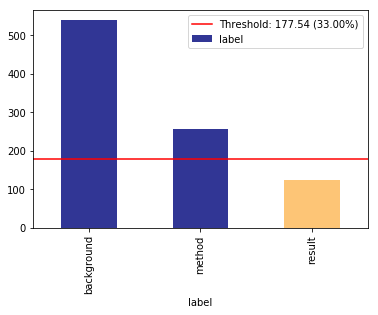

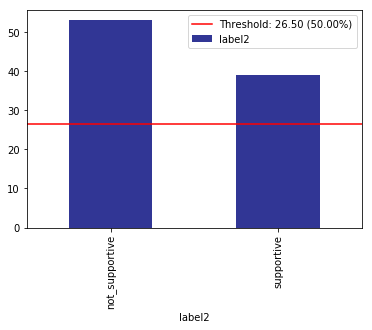

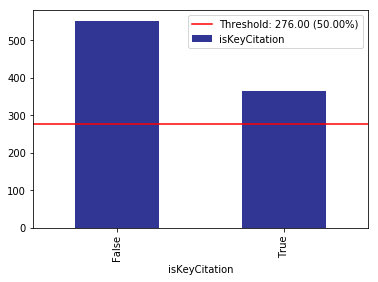

<IPython.core.display.Javascript object>

In [24]:
ims = xai.imbalance_plot(df_dev, "label", categorical_cols=["label"], threshold=0.33)
ims = xai.imbalance_plot(df_dev, "label2", categorical_cols=["label2"])
ims = xai.imbalance_plot(df_dev, "isKeyCitation", categorical_cols=["isKeyCitation"])

In [10]:
# dev file
train_file = os.path.join(data_dir, "train.jsonl")
train_data = load_jsonl(train_file)
df_train = pd.DataFrame(train_data)
df_train.head()

<IPython.core.display.Javascript object>

In [25]:
print(df_train.label.unique())
print(df_train.label2.unique())
print(df_train.isKeyCitation.unique())

['background' 'method' 'result']
[nan 'supportive' 'not_supportive' 'cant_determine']
[ True False]


<IPython.core.display.Javascript object>

#### Visualize class imbalance for the training set.

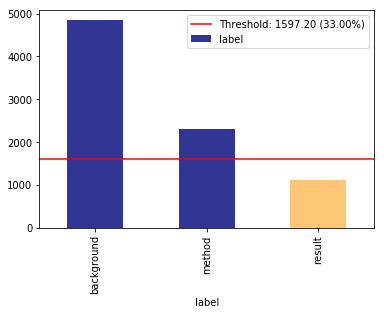

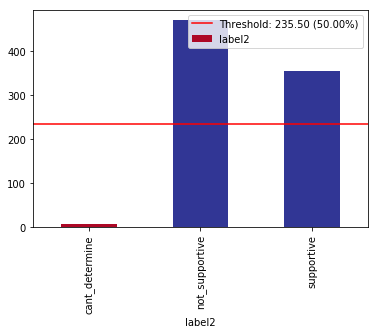

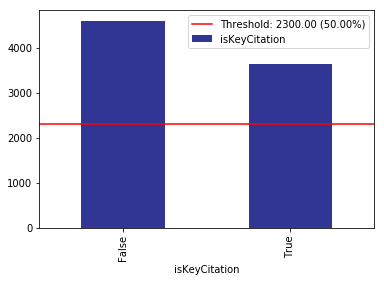

<IPython.core.display.Javascript object>

In [26]:
ims = xai.imbalance_plot(df_train, "label", categorical_cols=["label"], threshold=0.33)
ims = xai.imbalance_plot(df_train, "label2", categorical_cols=["label2"])
ims = xai.imbalance_plot(df_train, "isKeyCitation", categorical_cols=["isKeyCitation"])

In [6]:
# scaffolds
# note: 60 & 90 MB
cw_file = os.path.join(data_dir, "scaffolds", "cite-worthiness-scaffold-train.jsonl")
s_file = os.path.join(data_dir, "scaffolds", "sections-scaffold-train.jsonl")

# cite_worthiness_data = load_jsonl(cw_file)
# sections_data = load_jsonl(s_file)

<IPython.core.display.Javascript object>

# Results

- Dev set has no "cant_determine" class instances
- Both train and dev sets are imbalances